# Telecom Data Analysis (Part 2: Data Cleaning)

In [1]:
# Import Pandas library.
import pandas as pd

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dfEvent = pd.read_csv('data/events_data.csv')
dfEvent.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi
1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi
2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi
3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi
4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi


In [4]:
dfTrain = pd.read_csv('data/gender_age_train.csv')
dfTrain.head()

,Unnamed: 0,device_id,gender,age,group
0,0,-8076087639492063270,M,35,M32-38
1,1,-2897161552818060146,M,35,M32-38
2,2,-8260683887967679142,M,35,M32-38
3,3,-4938849341048082022,M,30,M29-31
4,4,245133531816851882,M,30,M29-31


In [5]:
dfModel = pd.read_csv('data/phone_brand_device_model.csv')
dfModel.head()

,Unnamed: 0,device_id,phone_brand,device_model
0,0,1877775838486905855,vivo,Y13
1,1,-3766087376657242966,小米,V183
2,2,-6238937574958215831,OPPO,R7s
3,3,8973197758510677470,三星,A368t
4,4,-2015528097870762664,小米,红米Note2


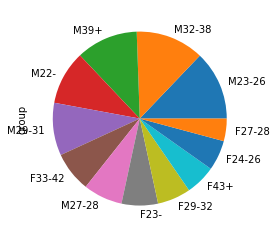

In [21]:
dfTrain.group.value_counts().plot(kind='pie')

In [37]:
dfModel.phone_brand.value_counts()

小米      21645
三星      19211
华为      15181
vivo     7596
OPPO     6717
魅族       5531
酷派       3979
HTC      1272
联想        982
乐视        841
努比亚       540
LG        360
中国移动      309
TCL       280
锤子        257
朵唯        253
优米        243
海信        218
一加        200
奇酷        174
语信        170
天语        161
摩托罗拉      106
酷比魔方       78
酷比         76
美图         70
ZUK        70
华硕         67
梦米         52
富可视        50
        ...  
金星数码        4
蓝魔          4
欧比          4
德赛          4
飞利浦         3
智镁          3
宝捷讯         3
优语          3
欧乐迪         3
惠普          3
首云          2
本为          2
PPTV        2
摩乐          2
唯比          2
鲜米          2
飞秒          2
世纪星         1
大显          1
西门子         1
欧沃          1
帷幄          1
MIL         1
瑞米          1
凯利通         1
丰米          1
瑞高          1
E人E本        1
赛博宇华        1
恒宇丰         1
Name: phone_brand, Length: 116, dtype: int64

In [17]:
dfGroup = dfTrain.groupby('group')
dfGroup.agg({'gender':{'count'}})


,gender
,count
group,
F23-,5050
F24-26,4190
F27-28,3118
F29-32,4628
F33-42,5561
F43+,4194
M22-,7488
M23-26,9605


In [23]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 5 columns):
Unnamed: 0    74645 non-null int64
device_id     74645 non-null int64
gender        74645 non-null object
age           74645 non-null int64
group         74645 non-null object
dtypes: int64(3), object(2)
memory usage: 2.8+ MB


In [24]:
dfModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 4 columns):
Unnamed: 0      87726 non-null int64
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


In [25]:
# Create a dictionary for brand mapping from chienese symbol to logical english meaning 
brandMapping = {'华为':'Huawei','小米':'Xiaomi', '三星':'Samsung', 'vivo':'vivo', 'OPPO':'OPPO', '魅族':'Meizu', '酷派':'Coolpad', '乐视':'LeEco', '联想':'Lenovo', 'HTC':'HTC'}
print(brandMapping)  

{'华为': 'Huawei', '小米': 'Xiaomi', '三星': 'Samsung', 'vivo': 'vivo', 'OPPO': 'OPPO', '魅族': 'Meizu', '酷派': 'Coolpad', '乐视': 'LeEco', '联想': 'Lenovo', 'HTC': 'HTC'}


In [45]:
def get_brand_name(symbol):
    '''
    This function used to return the logical phone brand name based on symbol.
    '''
    if(symbol not in brandMapping):
        return 'NA'
    
    # returns the brand name based on symbol
    return brandMapping[symbol]

Merge two 

In [46]:
dfDeviceAge = pd.merge(dfTrain, dfModel, on='device_id')
dfDeviceAge['phone_brand_name'] = dfDeviceAge.apply(lambda x: get_brand_name(x['phone_brand']), axis=1)
dfDeviceAge.head()

,Unnamed: 0_x,device_id,gender,age,group,Unnamed: 0_y,phone_brand,device_model,phone_brand_name
0,0,-8076087639492063270,M,35,M32-38,75448,小米,MI 2,Xiaomi
1,1,-2897161552818060146,M,35,M32-38,69289,小米,MI 2,Xiaomi
2,2,-8260683887967679142,M,35,M32-38,56746,小米,MI 2,Xiaomi
3,3,-4938849341048082022,M,30,M29-31,13109,三星,Galaxy S4,Samsung
4,4,245133531816851882,M,30,M29-31,13110,SUGAR,时尚手机,NA


In [50]:
dfDeviceAge[dfDeviceAge.phone_brand_name == 'NA'].phone_brand_name.value_counts()

NA    4867
Name: phone_brand_name, dtype: int64